In [28]:
!pip install opencv-contrib-python


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


In [30]:
# 读取图像
image_path = "../images/bold_curve.png"
# image_path = "../images/line.jpg"
# dir_path = os.path.dirname(os.path.realpath(__file__))
# image_path = os.path.join(dir_path, image_path)
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


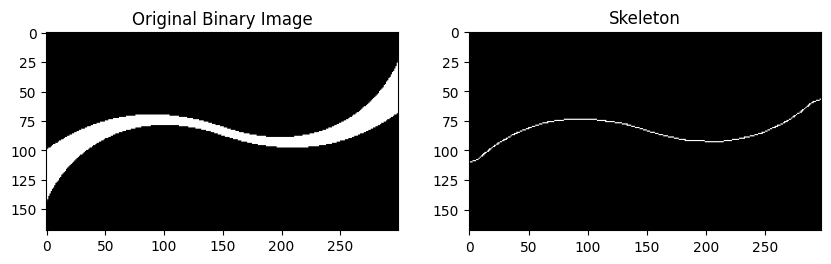

In [31]:
# 转换为二值图像
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

# 细化图像，找到骨架
skeleton = cv2.ximgproc.thinning(binary, thinningType=cv2.ximgproc.THINNING_ZHANGSUEN)

# drop first and last column
skeleton = skeleton[:, 1:-1]

# 显示结果
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Binary Image')
plt.imshow(binary, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Skeleton')
plt.imshow(skeleton, cmap='gray')
plt.show()

In [32]:
skeleton

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [33]:
traversal = np.array([[0, 1], [1, 0], [0, -1], [-1, 0], [1, 1], [1, -1], [-1, 1], [-1, -1]])
def get_neighbors(skeleton, x, y):
    neighbors = []
    for i in range(4):
        nx, ny = x + traversal[i][0], y + traversal[i][1]
        if nx >= 0 and nx < skeleton.shape[0] and ny >= 0 and ny < skeleton.shape[1]:
            neighbors.append((nx, ny))
    return neighbors



In [37]:
def get_all_points(skeleton):
    points = []
    for i in range(skeleton.shape[0]):
        for j in range(skeleton.shape[1]):
            if skeleton[i, j] == 255:
                points.append((i, j))
    return points

def get_end_points(skeleton):
    points = []
    for i in range(skeleton.shape[0]):
        for j in range(skeleton.shape[1]):
            if skeleton[i, j] == 255:
                neighbors = get_neighbors(skeleton, i, j)
                if len(neighbors) == 1:
                    points.append((i, j))
    return points

In [34]:
# # 从骨架中提取端点
# def get_endpoints(skeleton):
#     endpoints = []
#     for i in range(skeleton.shape[0]):
#         for j in range(skeleton.shape[1]):
#             if skeleton[i, j] == 255:
#                 neighbors = get_neighbors(skeleton, i, j)
#                 if sum([skeleton[nx, ny] == 255 for nx, ny in neighbors]) == 1:
#                     endpoints.append((i, j))
#     return endpoints


In [35]:
end_points = get_endpoints(skeleton)


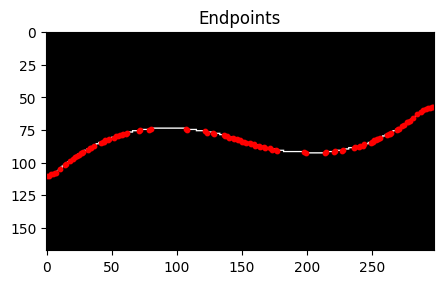

In [36]:
# draw endpoints

    
plt.figure(figsize=(5, 5))
plt.title('Endpoints')
plt.imshow(skeleton, cmap='gray')
plt.scatter([p[1] for p in end_points], [p[0] for p in end_points], c='r', s=10)
plt.show()